In [1]:
import pandas as pd
inputdf=pd.read_csv("C:\Files\cs_accepts.csv")

In [3]:
inputdf=inputdf.dropna()

In [5]:
inputdf
Target=inputdf['GB']
X=inputdf[['AGE','INCOME','TMJOB1','CHILDREN','CASH','PERS_H','TEL']]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,Target,test_size=0.33, random_state=42)

In [7]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [10]:
# Train the model with using DecisionTreeClassfier

Clf=DecisionTreeClassifier(criterion='gini',max_depth=2)
agac1=Clf.fit(X_train,y_train)

[Text(167.4, 181.2, 'X[0] <= 27.5\ngini = 0.5\nsamples = 1643\nvalue = [840, 803]'),
 Text(83.7, 108.72, 'X[1] <= 500.0\ngini = 0.446\nsamples = 554\nvalue = [186, 368]'),
 Text(41.85, 36.23999999999998, 'gini = 0.499\nsamples = 105\nvalue = [55, 50]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.413\nsamples = 449\nvalue = [131, 318]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 500.0\ngini = 0.48\nsamples = 1089\nvalue = [654, 435]'),
 Text(209.25, 36.23999999999998, 'gini = 0.377\nsamples = 313\nvalue = [234, 79]'),
 Text(292.95, 36.23999999999998, 'gini = 0.497\nsamples = 776\nvalue = [420, 356]')]

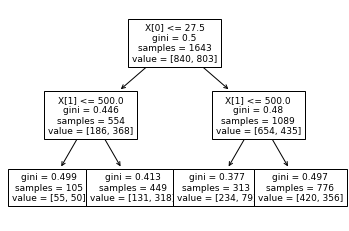

In [12]:
tree.plot_tree(agac1, fontsize=9)

In [13]:
# Hyperparameter Tuning 
from sklearn.model_selection import GridSearchCV
hyp_params={"max_depth": [1,3,5,7,9,11,12]}
tuning_model=GridSearchCV(agac1, param_grid=hyp_params, verbose=3, cv=5)

In [14]:
tuning_model.fit(X_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5] END ....................................max_depth=1; total time=   0.0s
[CV 2/5] END ....................................max_depth=1; total time=   0.0s
[CV 3/5] END ....................................max_depth=1; total time=   0.0s
[CV 4/5] END ....................................max_depth=1; total time=   0.0s
[CV 5/5] END ....................................max_depth=1; total time=   0.0s
[CV 1/5] END ....................................max_depth=3; total time=   0.0s
[CV 2/5] END ....................................max_depth=3; total time=   0.0s
[CV 3/5] END ....................................max_depth=3; total time=   0.0s
[CV 4/5] END ....................................max_depth=3; total time=   0.0s
[CV 5/5] END ....................................max_depth=3; total time=   0.0s
[CV 1/5] END ....................................max_depth=5; total time=   0.0s
[CV 2/5] END ....................................

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12]}, verbose=3)

In [15]:
tuning_model.best_params_

{'max_depth': 3}

In [16]:
Clf=DecisionTreeClassifier(criterion='gini',max_depth=3)
agac1=Clf.fit(X_train,y_train)

[Text(167.4, 190.26, 'X[0] <= 27.5\ngini = 0.5\nsamples = 1643\nvalue = [840, 803]'),
 Text(83.7, 135.9, 'X[1] <= 500.0\ngini = 0.446\nsamples = 554\nvalue = [186, 368]'),
 Text(41.85, 81.53999999999999, 'X[0] <= 24.5\ngini = 0.499\nsamples = 105\nvalue = [55, 50]'),
 Text(20.925, 27.180000000000007, 'gini = 0.475\nsamples = 49\nvalue = [19, 30]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.459\nsamples = 56\nvalue = [36, 20]'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 22.5\ngini = 0.413\nsamples = 449\nvalue = [131, 318]'),
 Text(104.625, 27.180000000000007, 'gini = 0.303\nsamples = 145\nvalue = [27, 118]'),
 Text(146.475, 27.180000000000007, 'gini = 0.45\nsamples = 304\nvalue = [104, 200]'),
 Text(251.10000000000002, 135.9, 'X[1] <= 500.0\ngini = 0.48\nsamples = 1089\nvalue = [654, 435]'),
 Text(209.25, 81.53999999999999, 'X[5] <= 3.5\ngini = 0.377\nsamples = 313\nvalue = [234, 79]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.303\nsamples = 220

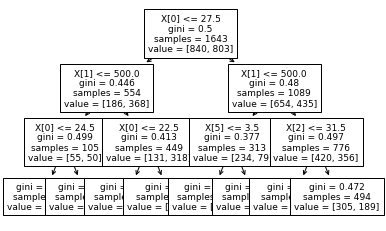

In [17]:
tree.plot_tree(agac1, fontsize=9)

In [18]:
tree_rules=export_text(agac1)

In [19]:
print(tree_rules)

|--- feature_0 <= 27.50
|   |--- feature_1 <= 500.00
|   |   |--- feature_0 <= 24.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  24.50
|   |   |   |--- class: 0
|   |--- feature_1 >  500.00
|   |   |--- feature_0 <= 22.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  22.50
|   |   |   |--- class: 1
|--- feature_0 >  27.50
|   |--- feature_1 <= 500.00
|   |   |--- feature_5 <= 3.50
|   |   |   |--- class: 0
|   |   |--- feature_5 >  3.50
|   |   |   |--- class: 0
|   |--- feature_1 >  500.00
|   |   |--- feature_2 <= 31.50
|   |   |   |--- class: 1
|   |   |--- feature_2 >  31.50
|   |   |   |--- class: 0

